In [48]:
from pgnano.stats_analysis.primitives import PGPoreType
from pgnano.stats_analysis.jupyter_data_preparation import flatten_sample_data
from functools import partial
from pgnano.stats_analysis.coding_analysis_scripts import *
from scipy.stats import geom, halfnorm
from scipy.linalg import lstsq
from scipy.fft import fft
from inspect import signature
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
import statistics

In [49]:
signal_data, chunk_data = flatten_sample_data(PGPoreType.P10_4_1,100)
one_signal = signal_data[0]

['/data/datananoraw/data_analysis/10_4_1/2d6ce589-PAG70058_pass_90cff557_229fb1c2_1643.pod5', '/data/datananoraw/data_analysis/10_4_1/58662236-PAG70133_pass_976dfe21_5dadfada_5.pod5', '/data/datananoraw/data_analysis/10_4_1/679e8449-PAG70058_pass_90cff557_229fb1c2_1581.pod5', '/data/datananoraw/data_analysis/10_4_1/7646a9e4-PAG65784_pass_f306681d_16a70748_508.pod5', '/data/datananoraw/data_analysis/10_4_1/889add85-PAG67404_fail_a8a15ce6_4a74c11f_28.pod5', '/data/datananoraw/data_analysis/10_4_1/898fa111-PAG68757_fail_39c39833_26077d5d_167.pod5', '/data/datananoraw/data_analysis/10_4_1/8ba56eeb-PAG65784_pass_f306681d_16a70748_1319.pod5', '/data/datananoraw/data_analysis/10_4_1/a60ded57-PAG65902_pass_96491aed_0156c9a3_1335.pod5', '/data/datananoraw/data_analysis/10_4_1/a7ff4244-PAG68757_pass_39c39833_26077d5d_944.pod5', '/data/datananoraw/data_analysis/10_4_1/af5d6be7-PAG70133_pass_976dfe21_5dadfada_1065.pod5', '/data/datananoraw/data_analysis/10_4_1/c2f433b8-PAG65902_fail_96491aed_0156c

In [50]:
error = transform_signal_to_error(one_signal)

In [51]:
code = transform_error_to_code(error)

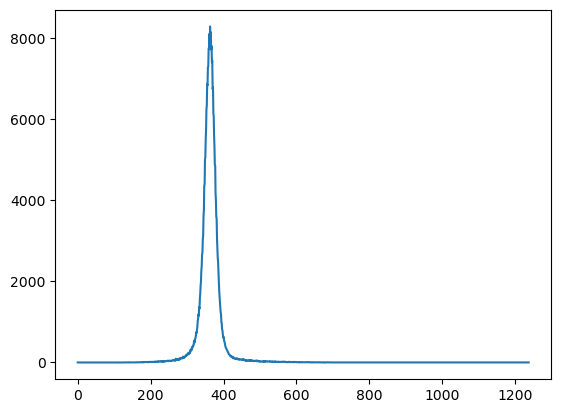

In [52]:
plt.plot(np.bincount(error - min(error)))

In [53]:
bit = 5

In [54]:
low_histogram_error, high_histogram_error = get_splitted_histograms(error,bit)

Text(0.5, 1.0, 'High')

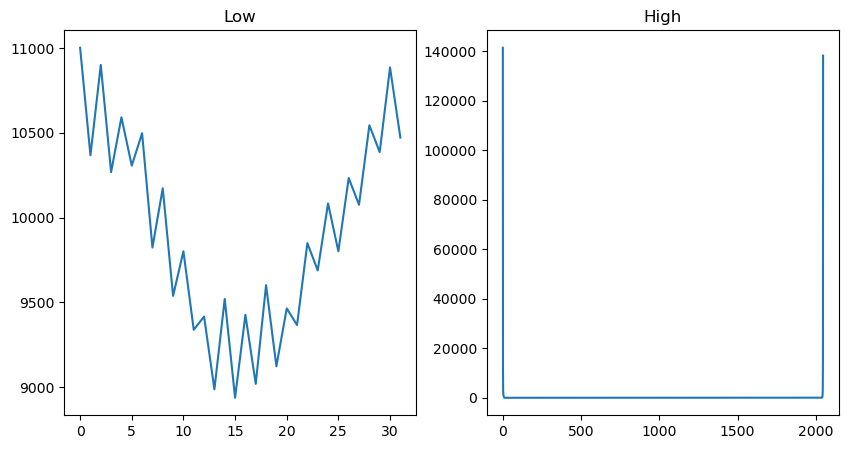

In [55]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(low_histogram_error)
axs[0].set_title('Low')
axs[1].plot(high_histogram_error)
axs[1].set_title('High')

In [56]:
low_histogram_code, high_histogram_code = get_splitted_histograms(code,bit)

In [57]:
with np.printoptions(threshold=np.inf):
    print(high_histogram_code)

[207249  71943  18963   7005   3617   2395   1506   1202    869    664
    529    382    292    206    191    123    118     82     59     36
     37     16     13      5      3      2      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      1      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      

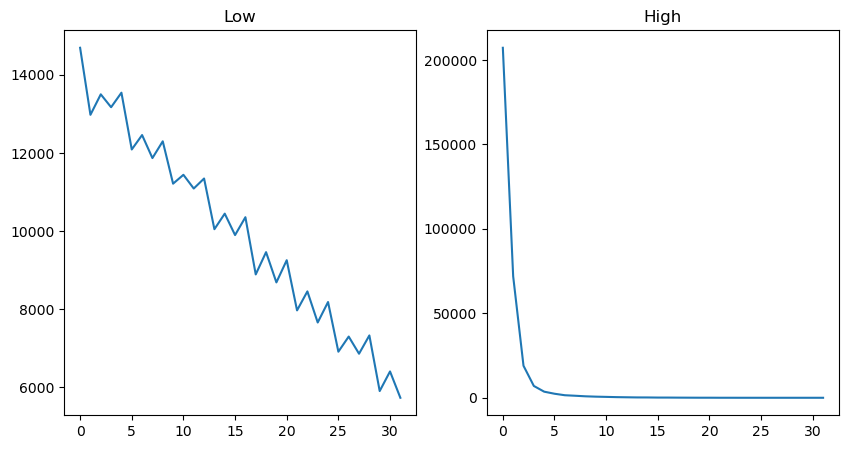

In [58]:
plot_histograms(low_histogram_code, high_histogram_code[:32], bit)

In [59]:
print(low_histogram_code)

[14692 12977 13501 13171 13543 12090 12459 11870 12299 11215 11442 11091
 11347 10050 10448  9900 10357  8893  9463  8689  9257  7973  8459  7663
  8187  6916  7303  6864  7332  5909  6411  5737]


In [60]:
p = estimate_geometric_param(code & ((1 << bit) - 1))
print(p)

0.07545417516049352


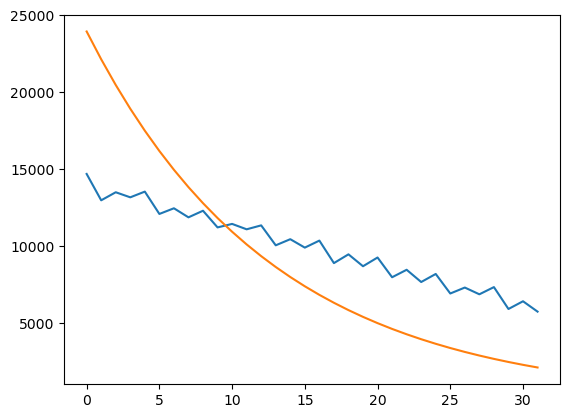

In [61]:
plt.plot(low_histogram_code)
plt.plot(geom.pmf(np.arange(geom.ppf(0.01, p), geom.ppf(0.99, p))[:len(low_histogram_code)],p)*len(code))

[13975.625       -261.51612903]


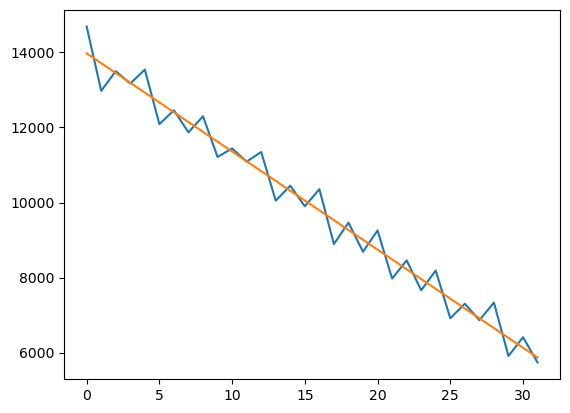

In [62]:
from itertools import repeat


linear_part = code & 31
linear_histogram = np.bincount(linear_part) 
plt.plot(linear_histogram)
foo = lstsq(np.column_stack((
                list(repeat(1,32)),
                range(32))
            ),linear_histogram)[0]
n = foo[0]
m = foo[1]
print(foo)
plt.plot(list(map(lambda x: m*x+n, range(32))))

In [63]:
(low_0, high_0), (low_1, high_1) = get_contextualised_histograms(one_signal, 6)

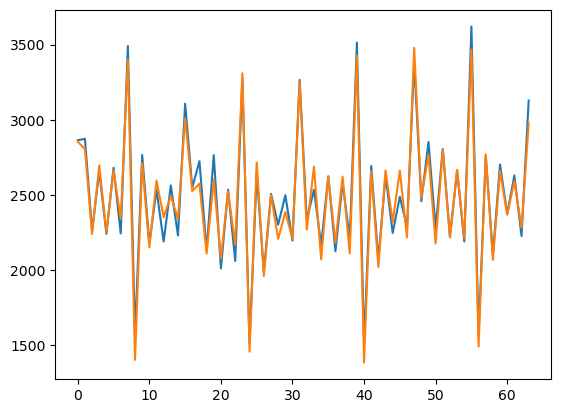

In [64]:
plt.plot(low_0)
plt.plot(low_1)

In [65]:
(low_0, high_0), (low_1, high_1) = get_contextualised_histograms(code, 5)

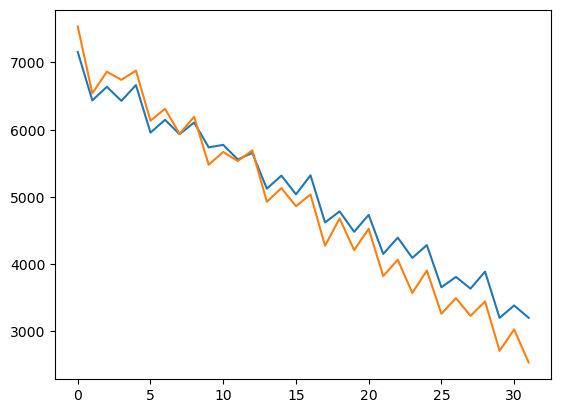

In [66]:
plt.plot(low_0)
plt.plot(low_1)
foo = lstsq(np.column_stack((
                list(repeat(1,32)),
                range(32))
            ),low_0)[0]
n = foo[0]
m = foo[1]
#print(foo)
#plt.plot(list(map(lambda x: m*x+n, range(32))))

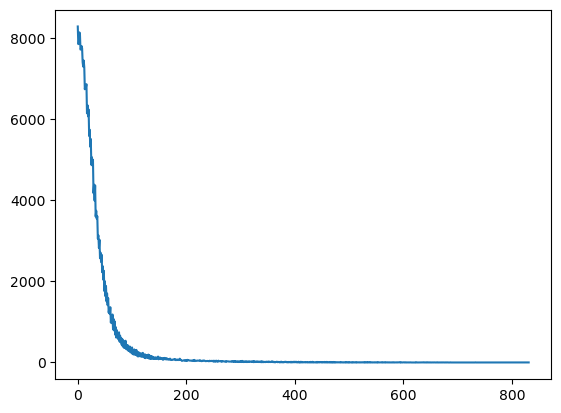

In [67]:
low = code & 0x0F
middle_low = code & 0x03FF
middle_high = code & 0x0F00
high = code & 0xF000

plt.plot(np.bincount(middle_low))

In [68]:
#plt.plot(fft(one_signal))

In [69]:
bit2 = 8

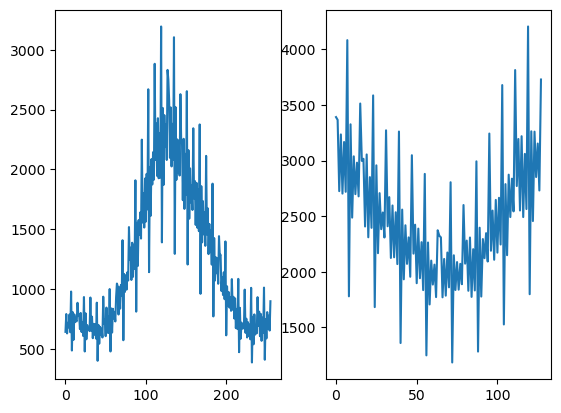

In [70]:
fig, axs = plt.subplots(1, 2)
axs[0].plot(np.bincount(one_signal & ((1 << 8) - 1)))
axs[1].plot(np.bincount(one_signal & ((1 << 7) - 1)))

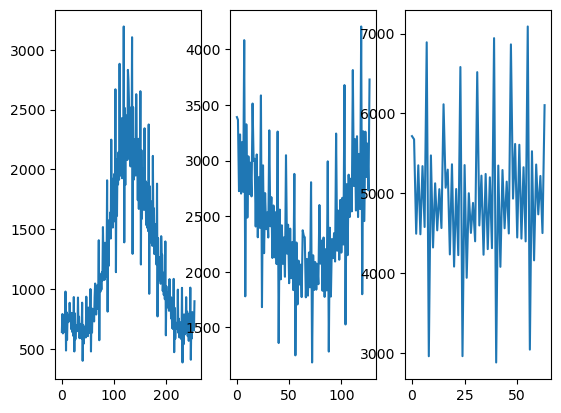

In [71]:
fig, axs = plt.subplots(1, 3)
axs[0].plot(np.bincount(one_signal & ((1 << 8) - 1)))
axs[1].plot(np.bincount(one_signal & ((1 << 7) - 1)))
axs[2].plot(np.bincount(one_signal & ((1 << 6) - 1)))

In [72]:
xs = code & ((1 << 7) - 1)
xss = np.bincount(xs) #/ (80000 * 5)
fitted_halfnorm = halfnorm(np.std(code & 0xff))

hf_in = np.linspace(0,(1 << 7),1000)



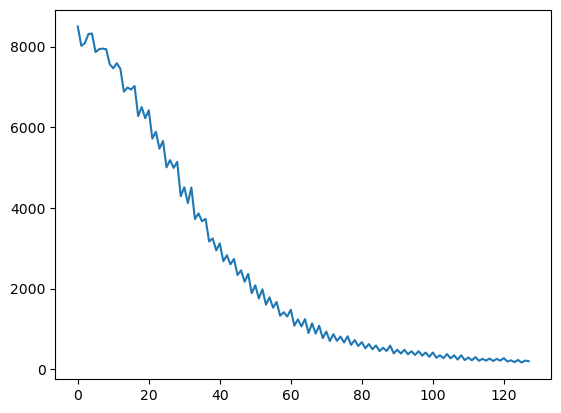

In [73]:
plt.plot(xss)
#figs, axs = plt.subplots(1,2)
#axs[0].plot(xss)
#axs[1].plot(hf_in, halfnorm.pdf(hf_in, scale=np.std(xs)))

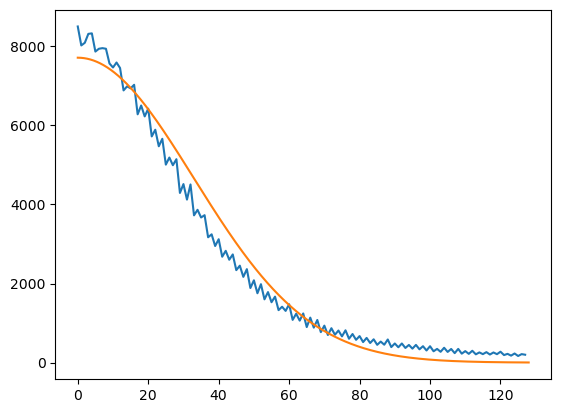

In [74]:
plt.plot(xss)
plt.plot(hf_in, halfnorm.pdf(hf_in, scale=np.std(xs) + 8) * len(code))

In [75]:
low_part = code & 0x1F

In [76]:
#plt.plot(np.bincount(code & 0x1F))
probabilities = np.bincount(low_part) / len(code)
code_len_low_estimate = 0 # Does not include model cost
for x in (code & 0x1F):
    code_len_low_estimate -= np.log2(probabilities[x])
low_part_bits_per_symbol_low_estimate = code_len_low_estimate / len(code)
print(f"The empirical entropy rate for the low part is {low_part_bits_per_symbol_low_estimate}, without considering model costs")

The empirical entropy rate for the low part is 4.955251642897646, without considering model costs


In [77]:
def add_previous_sample(xs: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    previous = np.append([0], xs[:-1])
    return (xs, previous)

In [78]:
def contextualize_even_odd_previous(xs: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    _, previous = add_previous_sample(xs)
    ctxs = [[], []]
    ctxs_idxs = previous & 0x1 
    for (x, idx) in zip(xs, ctxs_idxs):
        ctxs[idx].append(x)
    return ctxs, ctxs_idxs

In [79]:
def unwrap_ctxs(o) -> np.ndarray:
    ctxs, idxs = o
    return ctxs

In [80]:
even, odd = unwrap_ctxs(contextualize_even_odd_previous(low_part))
even_prob = np.bincount(even) / len(even)
odd_prob = np.bincount(odd) / len(odd)
code_len_low_estimate = 0
for x in even:
    code_len_low_estimate -= np.log2(even_prob[x])
for x in odd:
    code_len_low_estimate -= np.log2(odd_prob[x])
print(f"Empirial entropy rate (without model cost) is {code_len_low_estimate / len(low_part)}")

Empirial entropy rate (without model cost) is 4.919310618323393


In [81]:
def adaptive_probability_length_estimate(xs: np.ndarray):
    prob = np.ones(len(np.bincount(xs)))
    count = len(prob)
    code_len_low_estimate = 0
    for x in xs:
        code_len_low_estimate -= np.log2(prob[x] / count)
        prob[x] += 1
        count += 1
    return code_len_low_estimate

In [82]:
def process_entropy_lower_bound(xss: List[np.ndarray]):
    code_len_low_estimate = 0
    cummulative_len = sum(map(lambda x: len(x), xss))
    for xs in xss:
        code_len_low_estimate += adaptive_probability_length_estimate(xs)
    return code_len_low_estimate / cummulative_len

In [83]:
def contextualize_by_derivative_absolute_value(xs: np.ndarray) -> List[np.ndarray]:
    _, prev = add_previous_sample(xs)#np.concatenate([0], xs[:-1])
    _, prev_prev = add_previous_sample(prev)
    deriv = prev - prev_prev
    f = np.vectorize(lambda x: 0 if abs(x) > 7 else 1)
    ctxs_idxs = f(deriv)
    ctxs = [[],[]]
    for (x,idx) in zip(xs, ctxs_idxs):
        ctxs[idx].append(x)
    return ctxs, ctxs_idxs

In [84]:
def contextualize_by_derivative_sign(xs: np.ndarray) -> List[np.ndarray]:
    _, prev = add_previous_sample(xs)
    _, prev_prev = add_previous_sample(prev)
    deriv = prev - prev_prev
    f = np.vectorize(lambda x: 0 if x > 0 else 1)
    ctxs_idxs = f(deriv)
    ctxs = [[],[]]
    for (x, idx) in zip(xs, ctxs_idxs):
        ctxs[idx].append(x)
    return ctxs, ctxs_idxs

In [85]:
def contextualize_by_rugosity(xs: np.ndarray) -> List[np.ndarray]:
    _, xs_1 = add_previous_sample(xs)
    _, xs_2 = add_previous_sample(xs_1)
    _, xs_3 = add_previous_sample(xs_2)
    der_1 = xs_1 - xs_2
    der_2 = xs_2 - xs_3
    contexts = [[],[],[],[]]
    for x, d_1, d_2 in zip(xs, der_1, der_2):
        context_idx = []

In [86]:
def max_bits(x: np.unsignedinteger) -> np.unsignedinteger:
    i = 0
    while x / (2**i) > 0:
        i += 1
    return i

In [87]:
def contextualize_by_signal_1(xs: np.ndarray, signal: np.ndarray) -> List[np.ndarray]:
    signal_max = max(signal)
    signal_min = min(signal)
    threshold = (signal_max + signal_min) / 2
    f = np.vectorize(lambda x: 0 if x > threshold else 1)
    ctxs_idxs = f(add_previous_sample(signal)[1])
    ctxs = [[], []]
    for (x,idx) in zip(xs, ctxs_idxs):
        ctxs[idx].append(x)
    return ctxs, ctxs_idxs

In [88]:
def contextualize_by_signal_2(xs: np.ndarray, signal: np.ndarray) -> List[np.ndarray]:
    signal_max = max(signal)
    signal_min = min(signal)
    middle_point = (signal_max + signal_min) / 2
    f = np.vectorize(
        lambda x: 0 if x > (middle_point + signal_max) / 2 else
                  1 if x > (((middle_point + signal_max) / 2) + (middle_point))/2 else
                  2 if x > (signal_min + middle_point) / 2 else
                  3
    )
    ctxs_idxs = f(add_previous_sample(signal)[1])
    ctxs = [[], [], [], []]
    for (x, idx) in zip(xs, ctxs_idxs):
        ctxs[idx].append(x)
    return ctxs, ctxs_idxs

In [89]:
def cartesian_context(xs, f, h, signal = None) -> List[np.ndarray]:
    def call_by_signature(f, xs, signal):
        if len(signature(f)) == 1:
            return f(xs)
        elif len(signature(f)) == 2:
            return f(xs, signal)
        else:
            raise "Not recognized signature"

    ctxs_f, ctxs_idxs_f = call_by_signature(f, xs, signal)
    ctxs_h, ctxs_idxs_h = call_by_signature(h, xs, signal)# FIXME: ctxt_idxs should actually be the index in the input array
    

In [90]:
process_entropy_lower_bound([low_part])

4.955913889795664

In [91]:
process_entropy_lower_bound(unwrap_ctxs(contextualize_even_odd_previous(low_part)))

4.920541600263688

In [92]:
process_entropy_lower_bound(unwrap_ctxs(contextualize_by_derivative_absolute_value(low_part)))

4.956400860293818

In [93]:
process_entropy_lower_bound(unwrap_ctxs(contextualize_by_derivative_sign(low_part)))

4.956357602663067

In [94]:
process_entropy_lower_bound(unwrap_ctxs(contextualize_by_signal_1(low_part, one_signal)))

4.955052142149329

In [95]:
process_entropy_lower_bound(unwrap_ctxs(contextualize_by_signal_2(low_part, one_signal)))

4.95064642489646